In [1]:
try:
    import google.colab
    google.colab.drive.mount('/content/drive/')
    %cd ../content/drive/Othercomputers/Laptop/Flood_Detection
except:
    pass

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/Othercomputers/Laptop/Flood_Detection


In [2]:
import sys; 
sys.path.append('../../')
from DataPreparation.DataPreparation import read_data
from FeatureExtraction.Glcm.Glcm import apply_glcm, correlation_bet_positions, plot_glcm_features

### Data Preparation

In [3]:
x_train_d, x_val_d, y_train_d, y_val_d = read_data(gray=False, saved=True)

x_train shape:  (737, 256, 256, 3)
x_val shape:  (185, 256, 256, 3)


### Feature Extraction

In [4]:
# Define the positional operators
positions = [(1, 0), (0, 1), (1, 1)]

# Calculate GLCM features
glcm_features = apply_glcm(x_train_d, 1, positions)

100%|██████████| 737/737 [05:00<00:00,  2.45it/s]


In [5]:
correlation_bet_positions(glcm_features)

Correlation for Feature 1 and Channel 1:
[[1.        0.9342261 1.       ]
 [0.9342261 1.        0.9342261]
 [1.        0.9342261 1.       ]]

Correlation for Feature 1 and Channel 2:
[[1.        0.9422085 1.       ]
 [0.9422085 1.        0.9422085]
 [1.        0.9422085 1.       ]]

Correlation for Feature 1 and Channel 3:
[[1.         0.94044021 1.        ]
 [0.94044021 1.         0.94044021]
 [1.         0.94044021 1.        ]]

Correlation for Feature 1 and Channel 4:
[[1.         0.95345596 1.        ]
 [0.95345596 1.         0.95345596]
 [1.         0.95345596 1.        ]]

Correlation for Feature 2 and Channel 1:
[[1.         0.98587218 1.        ]
 [0.98587218 1.         0.98587218]
 [1.         0.98587218 1.        ]]

Correlation for Feature 2 and Channel 2:
[[1.         0.98531852 1.        ]
 [0.98531852 1.         0.98531852]
 [1.         0.98531852 1.        ]]

Correlation for Feature 2 and Channel 3:
[[1.         0.98590004 1.        ]
 [0.98590004 1.         0.98590004]

Upon evaluating the correlation between different positional operators for the same GLCM feature and channel, it was observed that there is a strong correlation across all images. The utilization of multiple positional operators aims to achieve rotation invariance. However, since the correlation between these operators is high, it indicates that they provide redundant information.

Therefore, based on the findings, we'll retain only one positional operator for further analysis. This decision will help reducing redundancy in the feature set and computation time.

In [6]:
# Keep only one positional operator
glcm_features = glcm_features[:, 2, :, :]

Assessing Relation beteen each 2 features for the gray channel


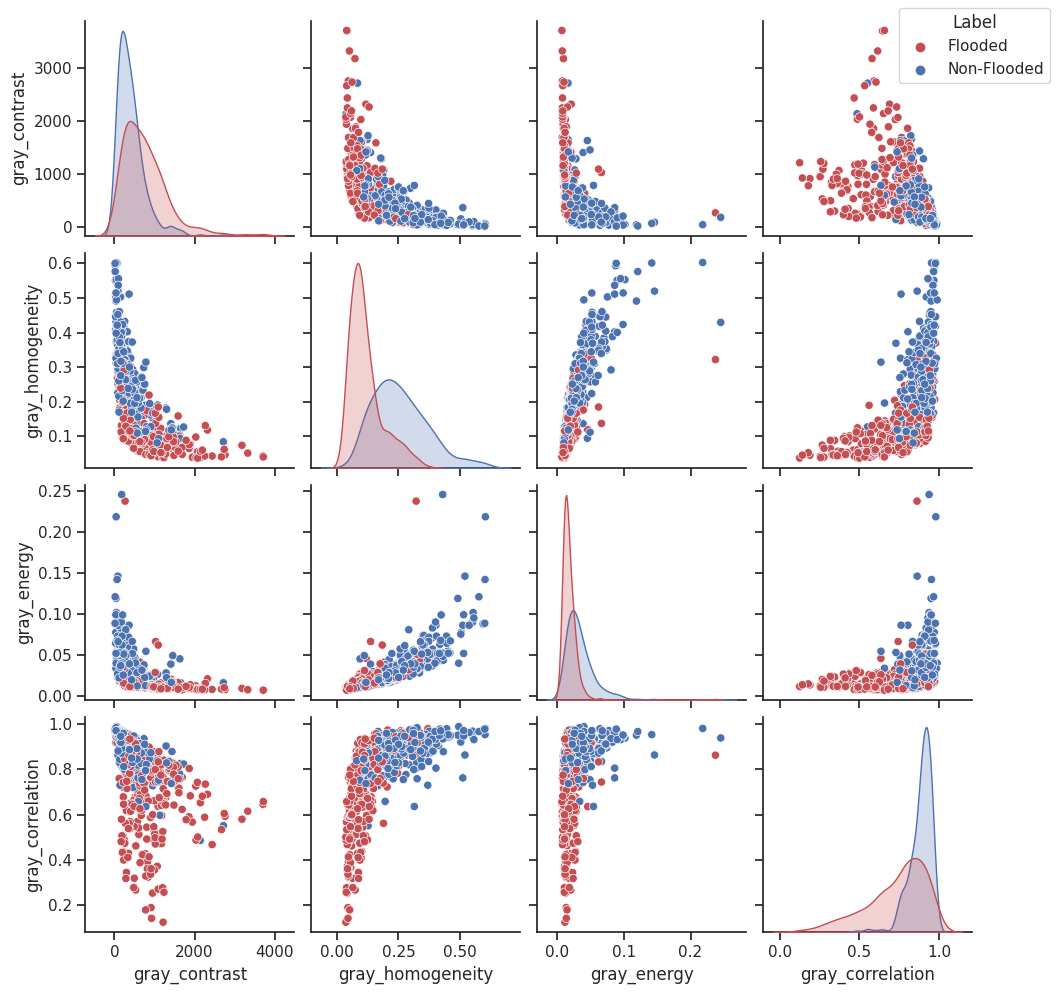

<Figure size 640x480 with 0 Axes>

In [7]:
plot_glcm_features(glcm_features, y=y_train_d, channel_index=0)

Assessing Relation beteen each 2 features for the r channel


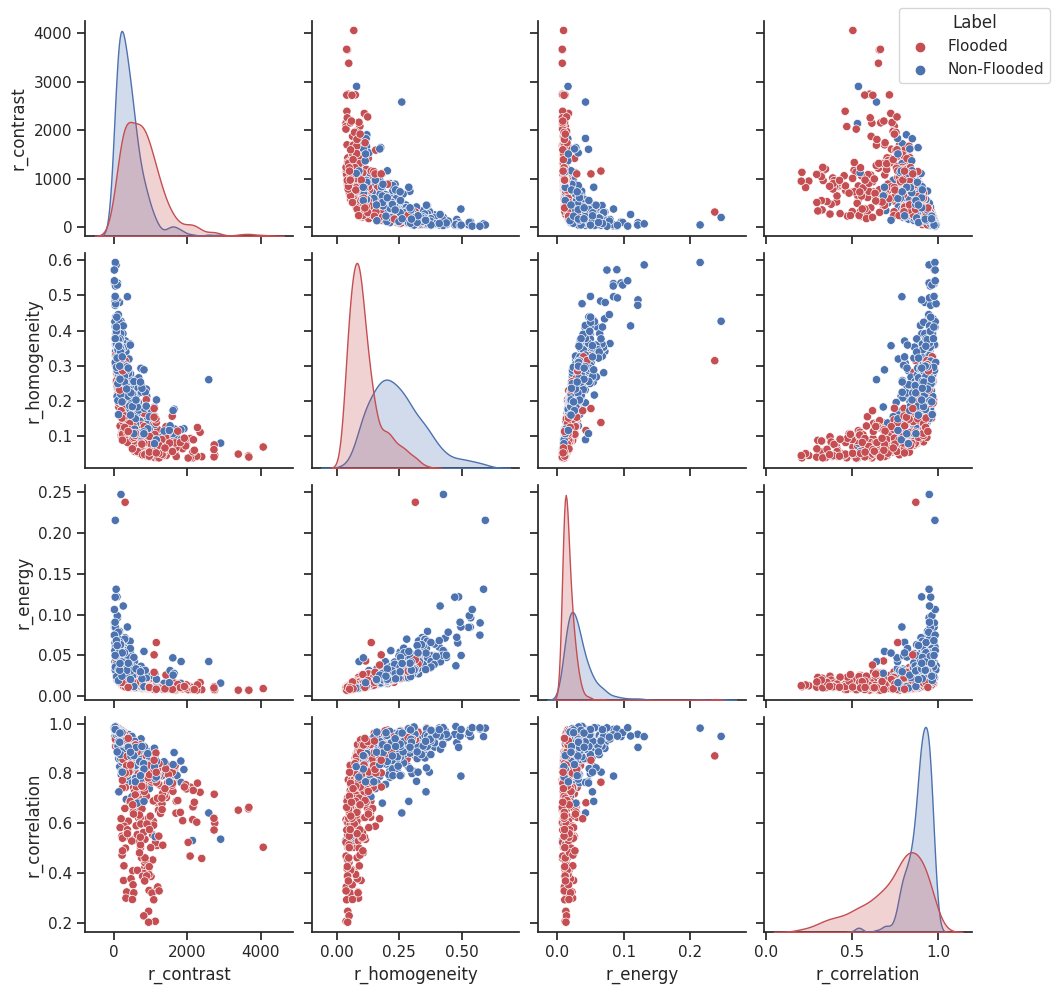

<Figure size 640x480 with 0 Axes>

In [8]:
plot_glcm_features(glcm_features, y=y_train_d, channel_index=1)

Assessing Relation beteen each 2 features for the g channel


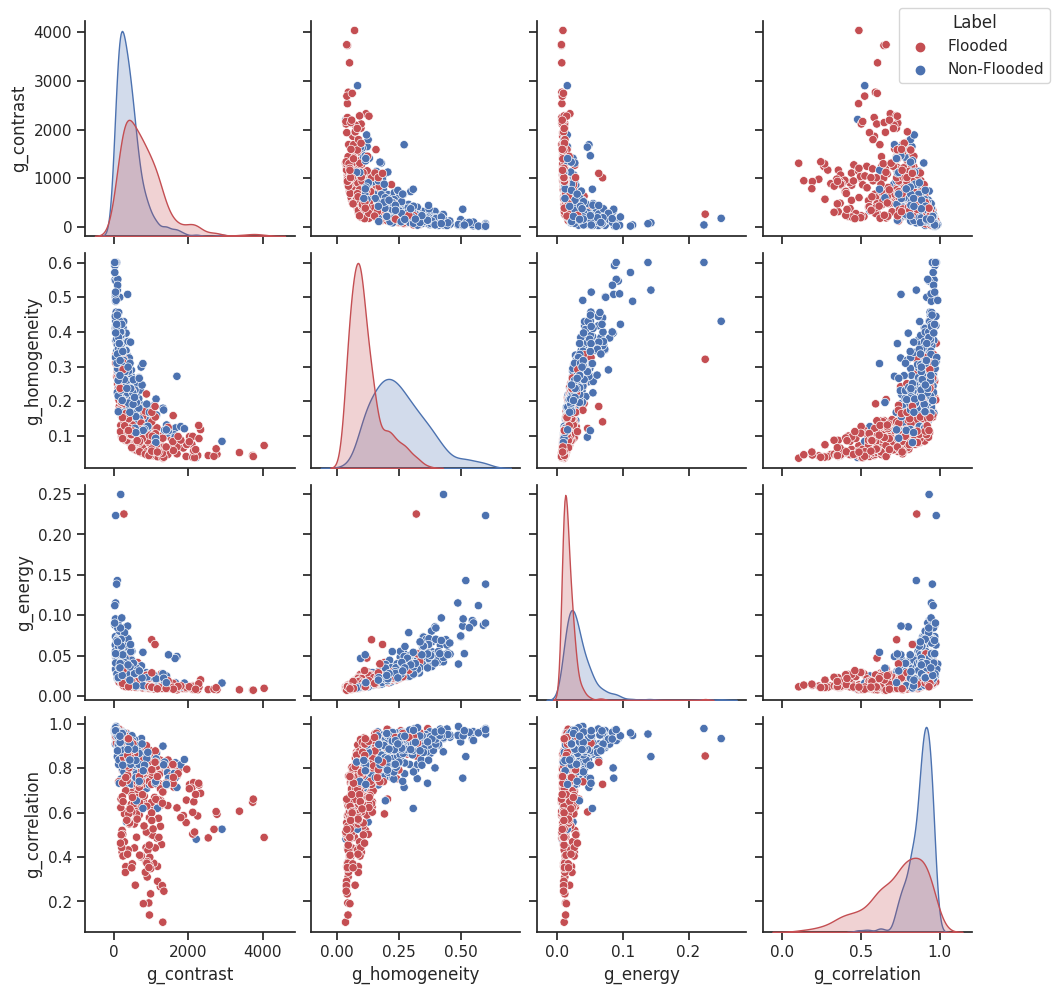

<Figure size 640x480 with 0 Axes>

In [9]:
plot_glcm_features(glcm_features, y=y_train_d, channel_index=2)

Assessing Relation beteen each 2 features for the b channel


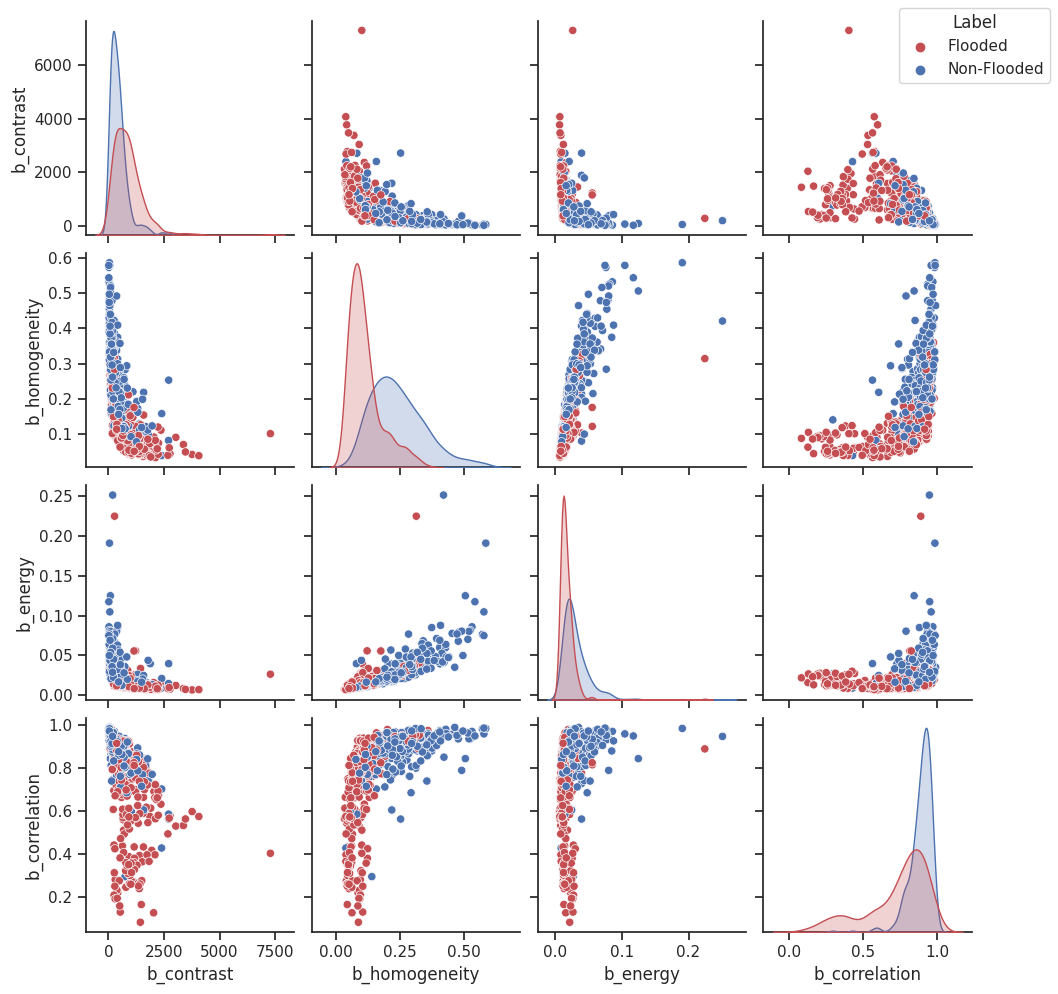

<Figure size 640x480 with 0 Axes>

In [10]:
plot_glcm_features(glcm_features, y=y_train_d, channel_index=3)

Among the analyzed features, the most discriminative one is homogeneity, which exhibits a higher value for flooded areas compared to non-flooded areas. This observation aligns with our expectations, as high homogeneity implies that similar pixel values occur together more frequently. In the case of flooded regions, where water covers a significant portion of the image, the spatial proximity of water pixels contributes to the increased homogeneity.